<a href="https://colab.research.google.com/github/yain22/Data-manipulation-with-R-and-Python/blob/master/Working_with_Two_Datasets_Binds%2C_Set_Operations%2C_and_Joins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Two Datasets: Binds, Set Operations, and Joins

## Installation

In [1]:
install.packages("tidyverse")
library("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
install.packages("devtools")
devtools::install_github("rstudio/EDAWR")
library("EDAWR")
# Datasets: stroms, pollution, cases, tb

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




glue         (1.4.1 -> 1.4.2      ) [CRAN]
vctrs        (0.3.2 -> 0.3.4      ) [CRAN]
curl         (4.2   -> 4.3        ) [CRAN]
TTR          (NA    -> 0.24.1     ) [CRAN]
xts          (NA    -> 0.12-0     ) [CRAN]
quantmod     (NA    -> 0.4.17     ) [CRAN]
zoo          (NA    -> 1.8-8      ) [CRAN]
quadprog     (NA    -> 1.5-8      ) [CRAN]
rprojroot    (1.2   -> 1.3-2      ) [CRAN]
farver       (2.0.1 -> 2.0.3      ) [CRAN]
RcppArmad... (NA    -> 0.9.900.2.0) [CRAN]
urca         (NA    -> 1.3-0      ) [CRAN]
tseries      (NA    -> 0.10-47    ) [CRAN]
timeDate     (NA    -> 3043.102   ) [CRAN]
lmtest       (NA    -> 0.9-37     ) [CRAN]
fracdiff     (NA    -> 1.5-1      ) [CRAN]
babynames    (NA    -> 1.0.0      ) [CRAN]
forecast     (NA    -> 8.12       ) [CRAN]


Installing 18 packages: glue, vctrs, curl, TTR, xts, quantmod, zoo, quadprog, rprojroot, farver, RcppArmadillo, urca, tseries, timeDate, lmtest, fracdiff, babynames, forecast

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmp6GeJFL/remotes6715c1b6a9/rstudio-EDAWR-fbfee98/DESCRIPTION’
─  preparing ‘EDAWR’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘EDAWR_0.1.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘EDAWR’


The following object is masked from ‘package:dplyr’:

    storms


The following objects are masked from ‘package:tidyr’:

    population, who




## Joining data with cbind(), rbind(), and union()

In [6]:
y = data.frame(x1 = c("A","B","C"),x2=c(1,2,3))
z = data.frame(x1 = c("B","C","D"),x2=c(2,3,4))

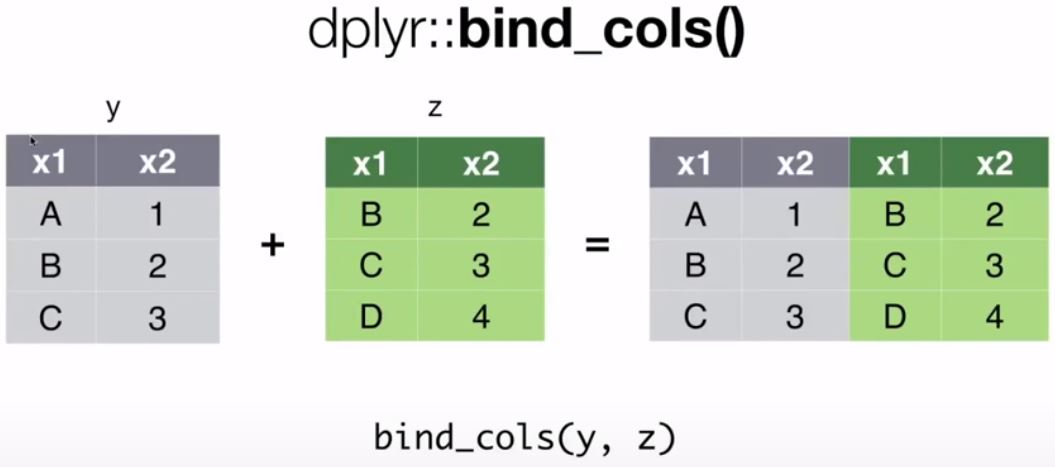

In [7]:
cbind(y,z)

x1,x2,x1,x2
<fct>,<dbl>,<fct>,<dbl>
A,1,B,2
B,2,C,3
C,3,D,4


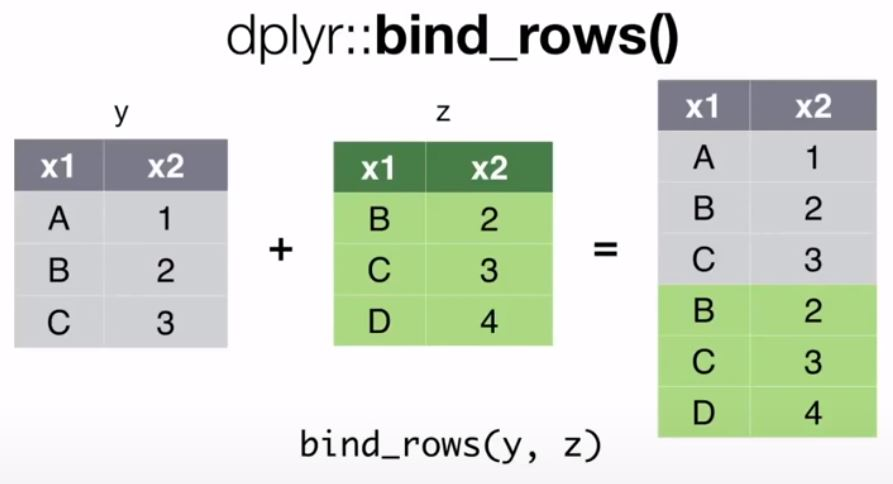

In [8]:
rbind(y,z)

x1,x2
<fct>,<dbl>
A,1
B,2
C,3
B,2
C,3
D,4


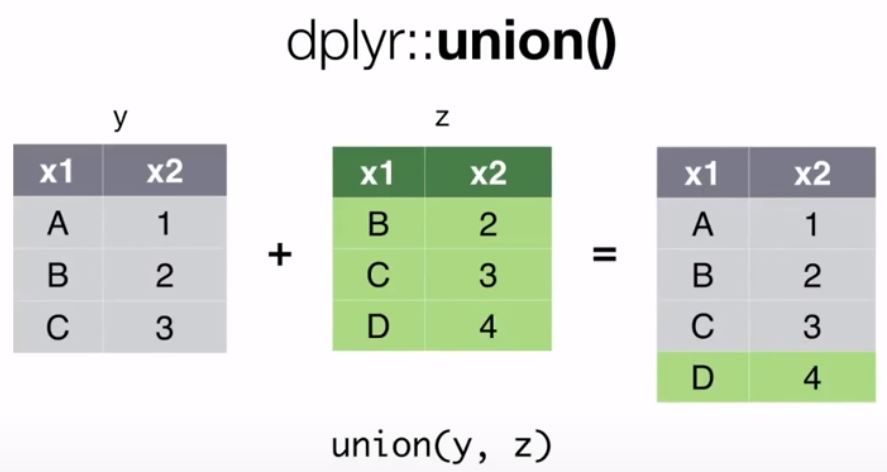

In [9]:
union(y,z)

x1,x2
<fct>,<dbl>
A,1
B,2
C,3
D,4


## Intersect() and setdiff()

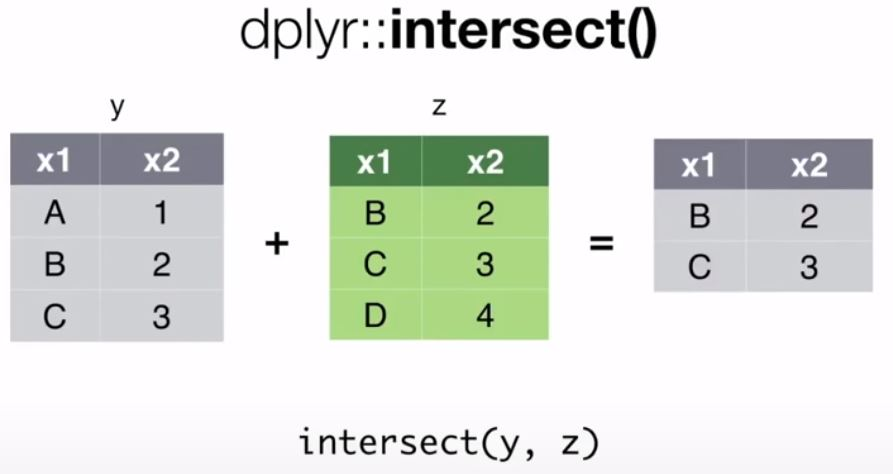

In [10]:
intersect(y,z)

x1,x2
<fct>,<dbl>
B,2
C,3


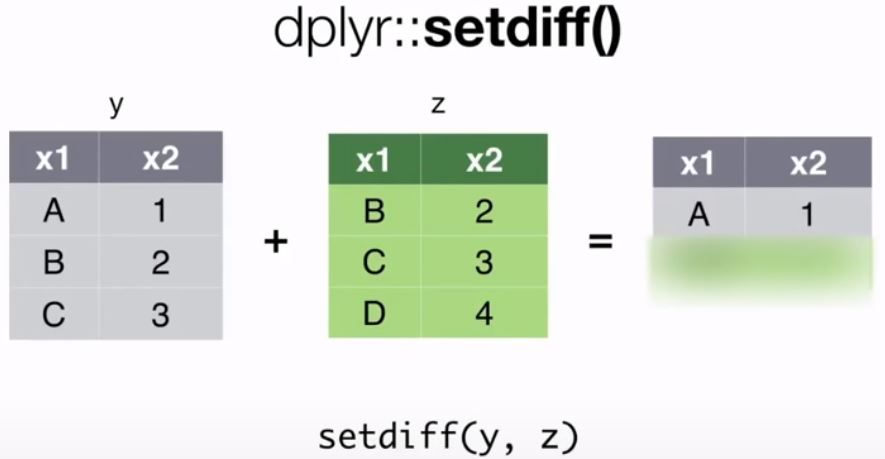

In [11]:
setdiff(y,z)

x1,x2
<fct>,<dbl>
A,1


## left_join()

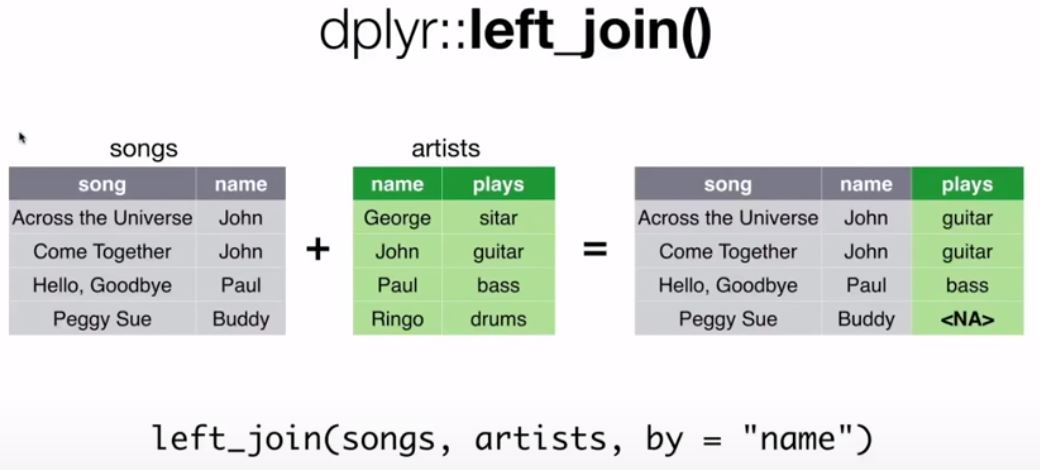

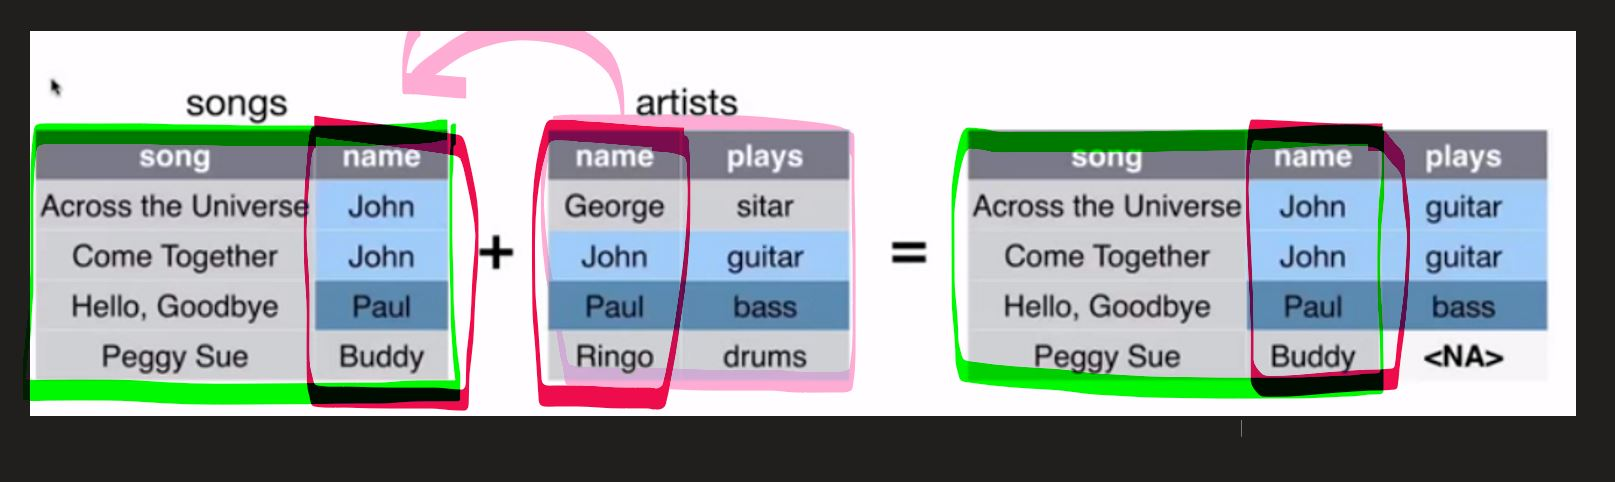

Steps of the left_join():

*   Step 1: Preserve the contents of the key varriable(s) from the 1st (left) dataset; (we don' care contents of the key varriable(s) from the 2nd (right) dataset;
*   Step 2: Join the two datasets;

In this way, it is likely that 

* the data structure of the 1st (left) dataset may be preserved;
* However, the data structure of the 2nd (right) dataset may be distorted, and NA may occurs;

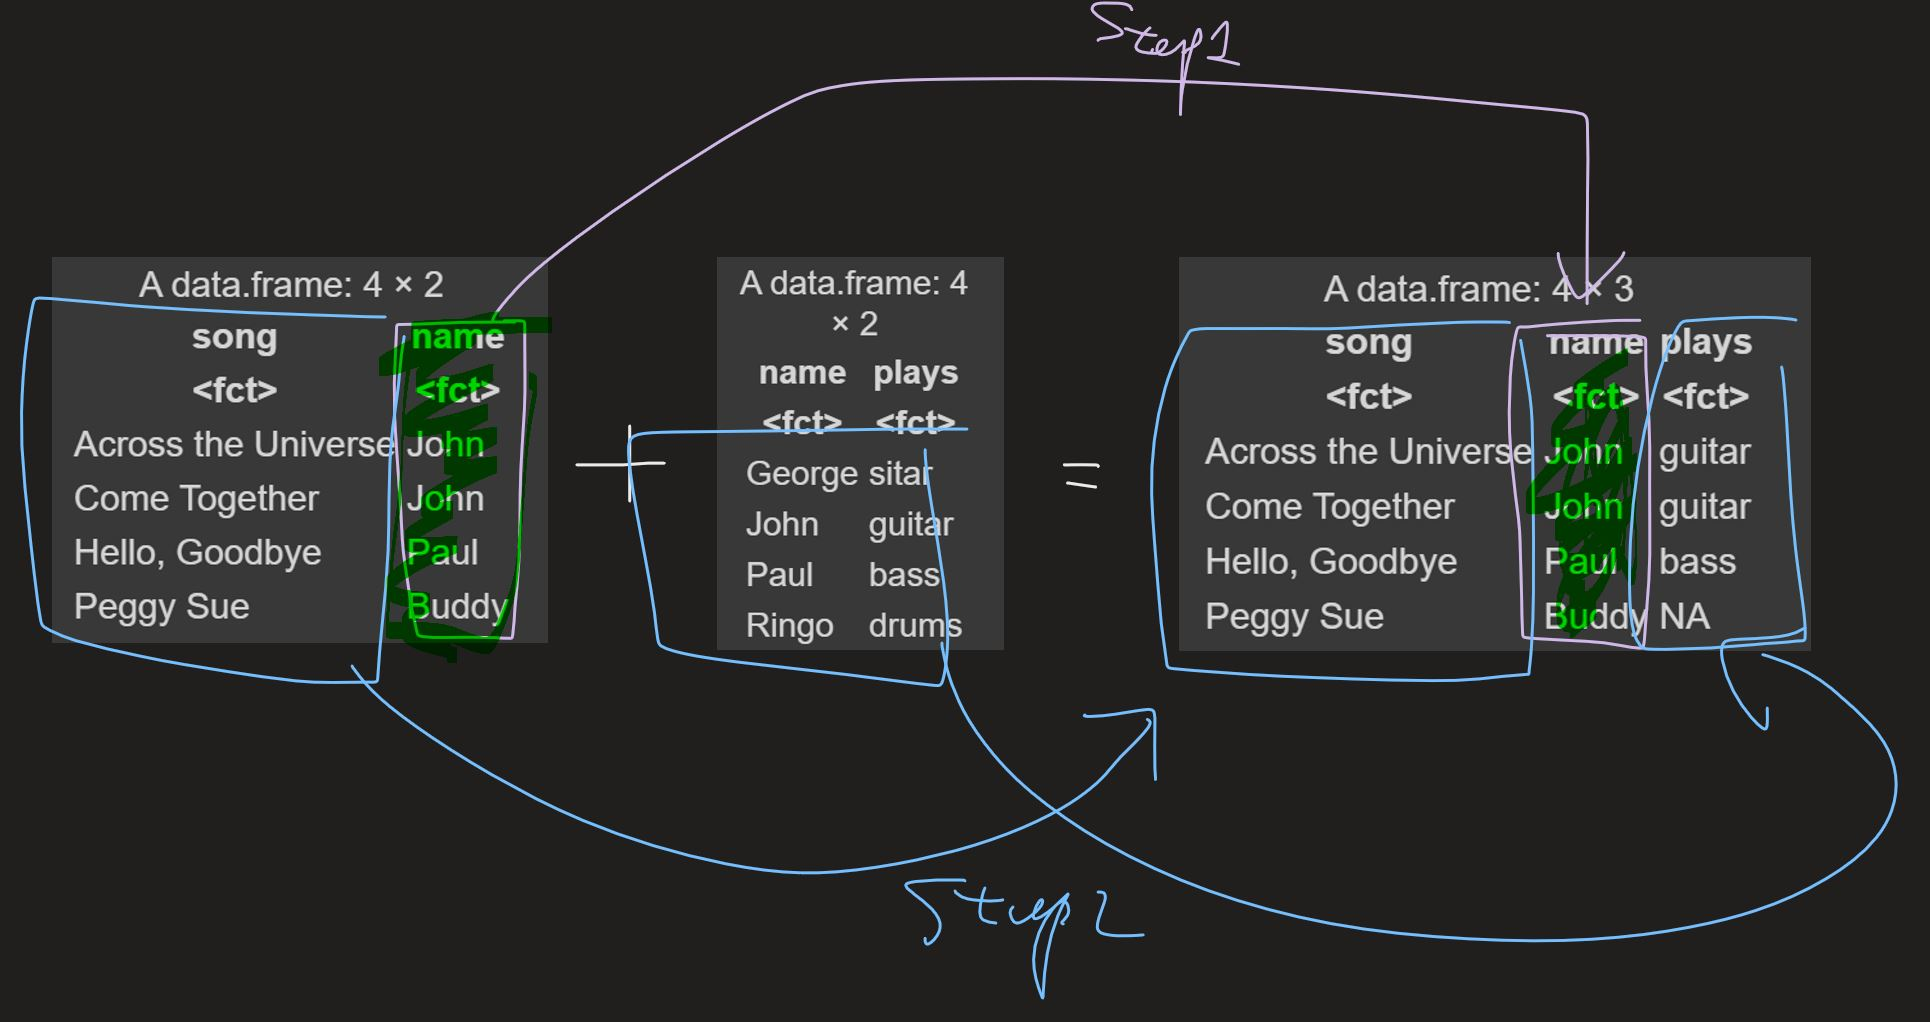

In [35]:
songs = data.frame(song = c("Across the Universe","Come Together","Hello, Goodbye","Peggy Sue"),
                   name = c("John","John","Paul","Buddy"))
artists = data.frame(name = c("George","John","Paul","Ringo"), 
                    plays = c("sitar","guitar","bass","drums"))


songs

artists


left_join(songs, artists, by = "name")

song,name
<fct>,<fct>
Across the Universe,John
Come Together,John
"Hello, Goodbye",Paul
Peggy Sue,Buddy


name,plays
<fct>,<fct>
George,sitar
John,guitar
Paul,bass
Ringo,drums


song,name,plays
<fct>,<fct>,<fct>
Across the Universe,John,guitar
Come Together,John,guitar
"Hello, Goodbye",Paul,bass
Peggy Sue,Buddy,NA


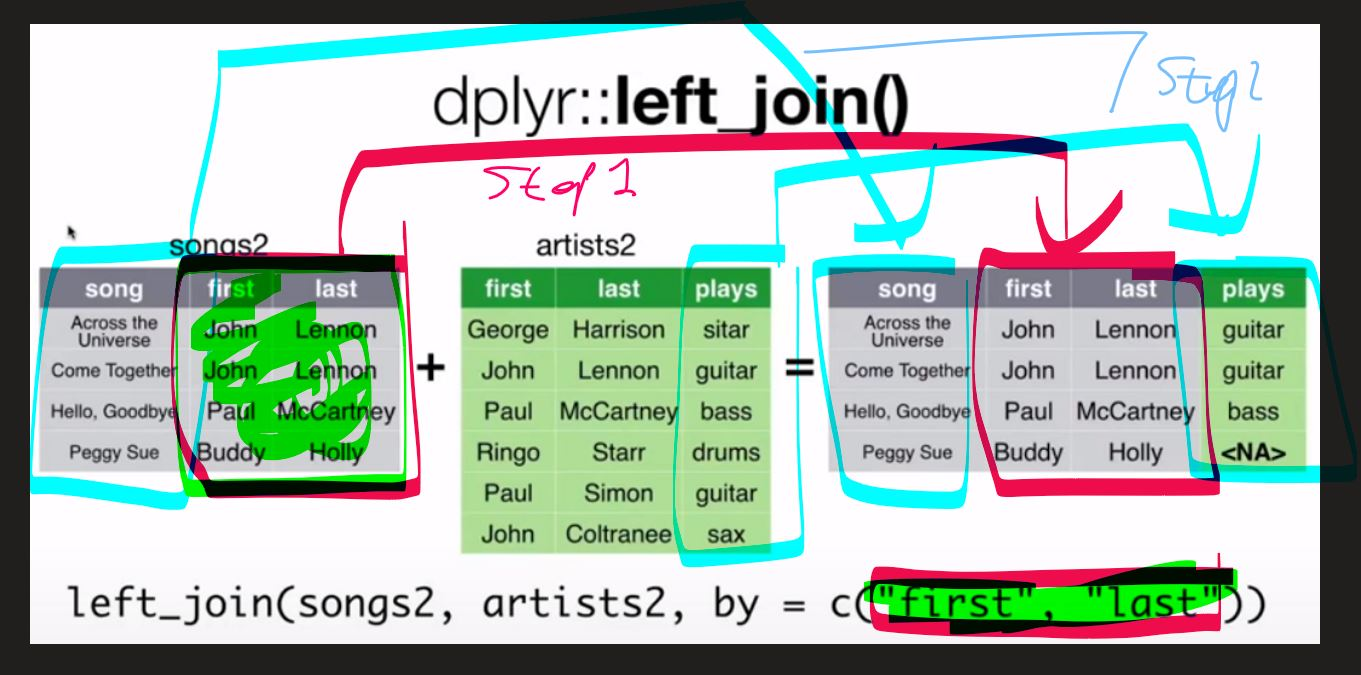

In [46]:
union_join(songs2, artists2,  by = c("first","last"))

song,first,last,plays
<chr>,<chr>,<chr>,<chr>
Across the Universe,John,Lennon,guitar
Come Together,John,Lennon,guitar
"Hello, Goodbye",Paul,McCartney,bass
Peggy Sue,Buddy,Holly,NA
NA,George,Harrison,sitar
NA,Ringo,Starr,drums
NA,Paul,Simon,guitar
NA,John,Coltrane,sax


## right_join()

Steps of the right_join():

*   Step 1: Preserve the contents of the key varriable(s) from the 2nd (right) dataset; (we don' care contents of the key varriable(s) from the 1nd (left) dataset;
*   Step 2: Join the two datasets;

In this way, it is likely that 

* the data structure of the 2nd (right) dataset may be preserved;
* However, the data structure of the 1nd (first) dataset may be distorted, and NA may occurs;




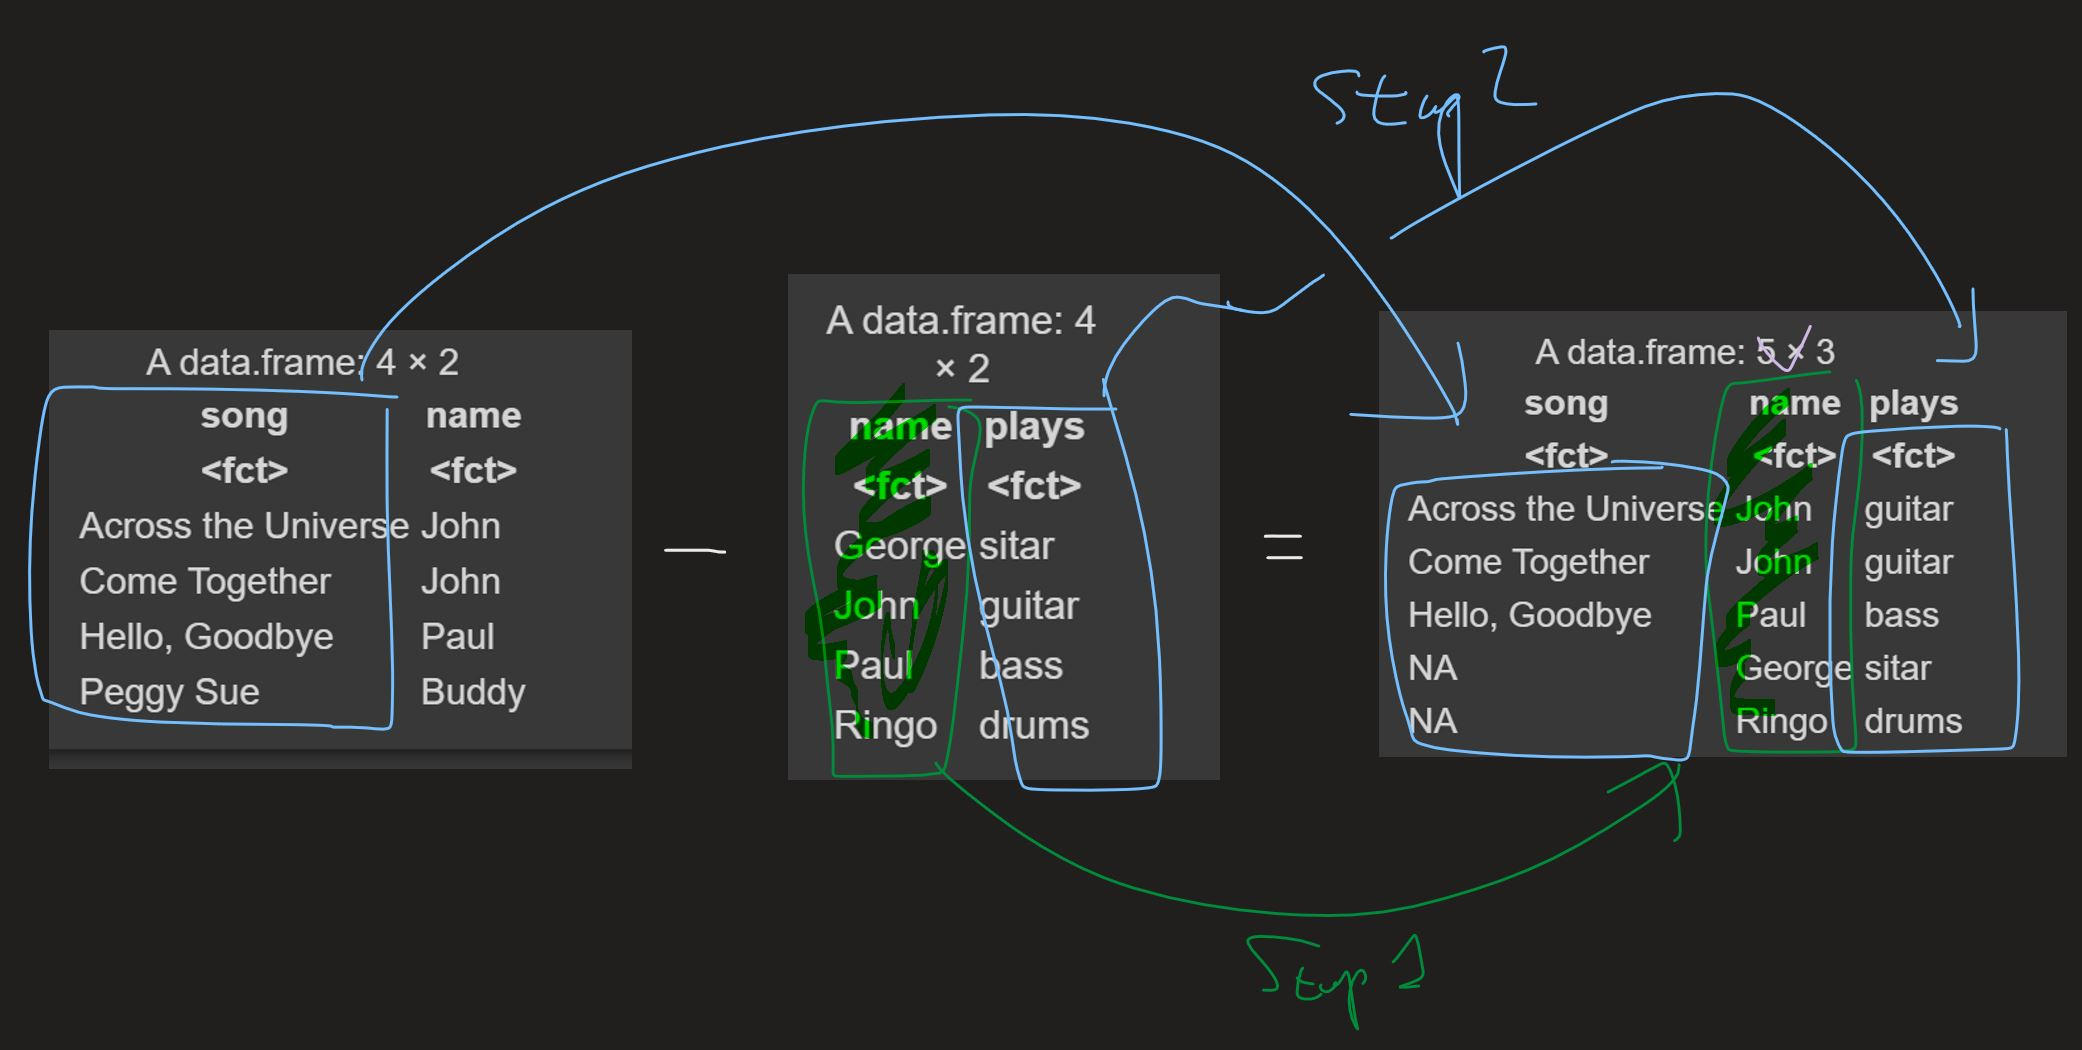

In [34]:
right_join(songs, artists, by = "name")

song,name,plays
<fct>,<fct>,<fct>
Across the Universe,John,guitar
Come Together,John,guitar
"Hello, Goodbye",Paul,bass
NA,George,sitar
NA,Ringo,drums


## inner_join()

inner_join() is the most EXCLUSIVE joining among left_join(), right_join(), and full_join()

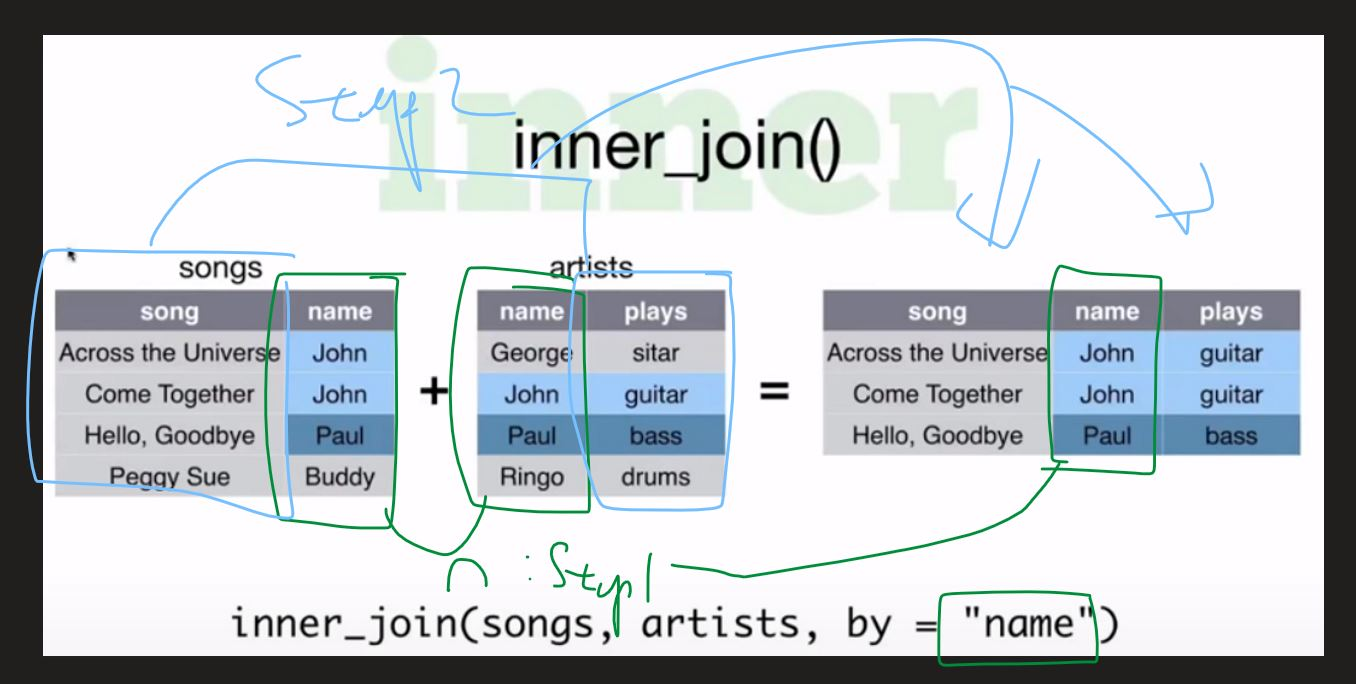

Step of inner_join()



1.   Step 1: Obtain the **intersection** of the key variable(s) from the two datasets;
3.   Step 2: Join the two datasets



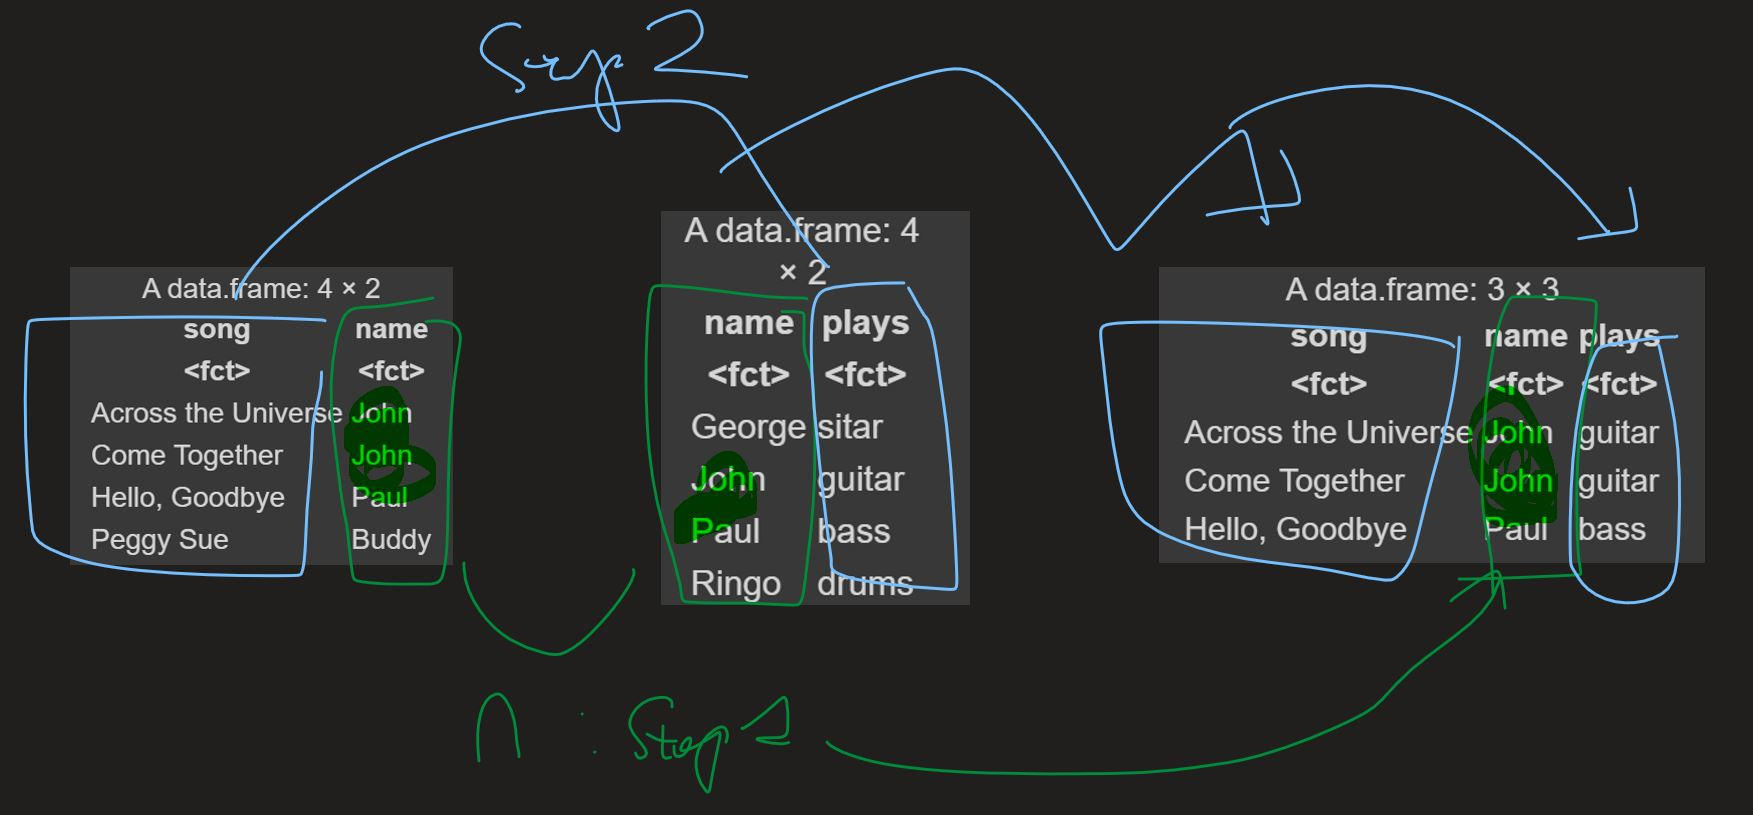

In [37]:
inner_join(songs, artists, by = "name")

song,name
<fct>,<fct>
Across the Universe,John
Come Together,John
"Hello, Goodbye",Paul
Peggy Sue,Buddy


name,plays
<fct>,<fct>
George,sitar
John,guitar
Paul,bass
Ringo,drums


song,name,plays
<fct>,<fct>,<fct>
Across the Universe,John,guitar
Come Together,John,guitar
"Hello, Goodbye",Paul,bass


## full_join()

full_join() is the most INCLUSIVE joining among left_join(), right_join(), and full_join()

Step of full_join():

1.   Step 1: Obtain the **union** of the key variable(s) from the two datasets;
2.   Step 2: Join the two datasets




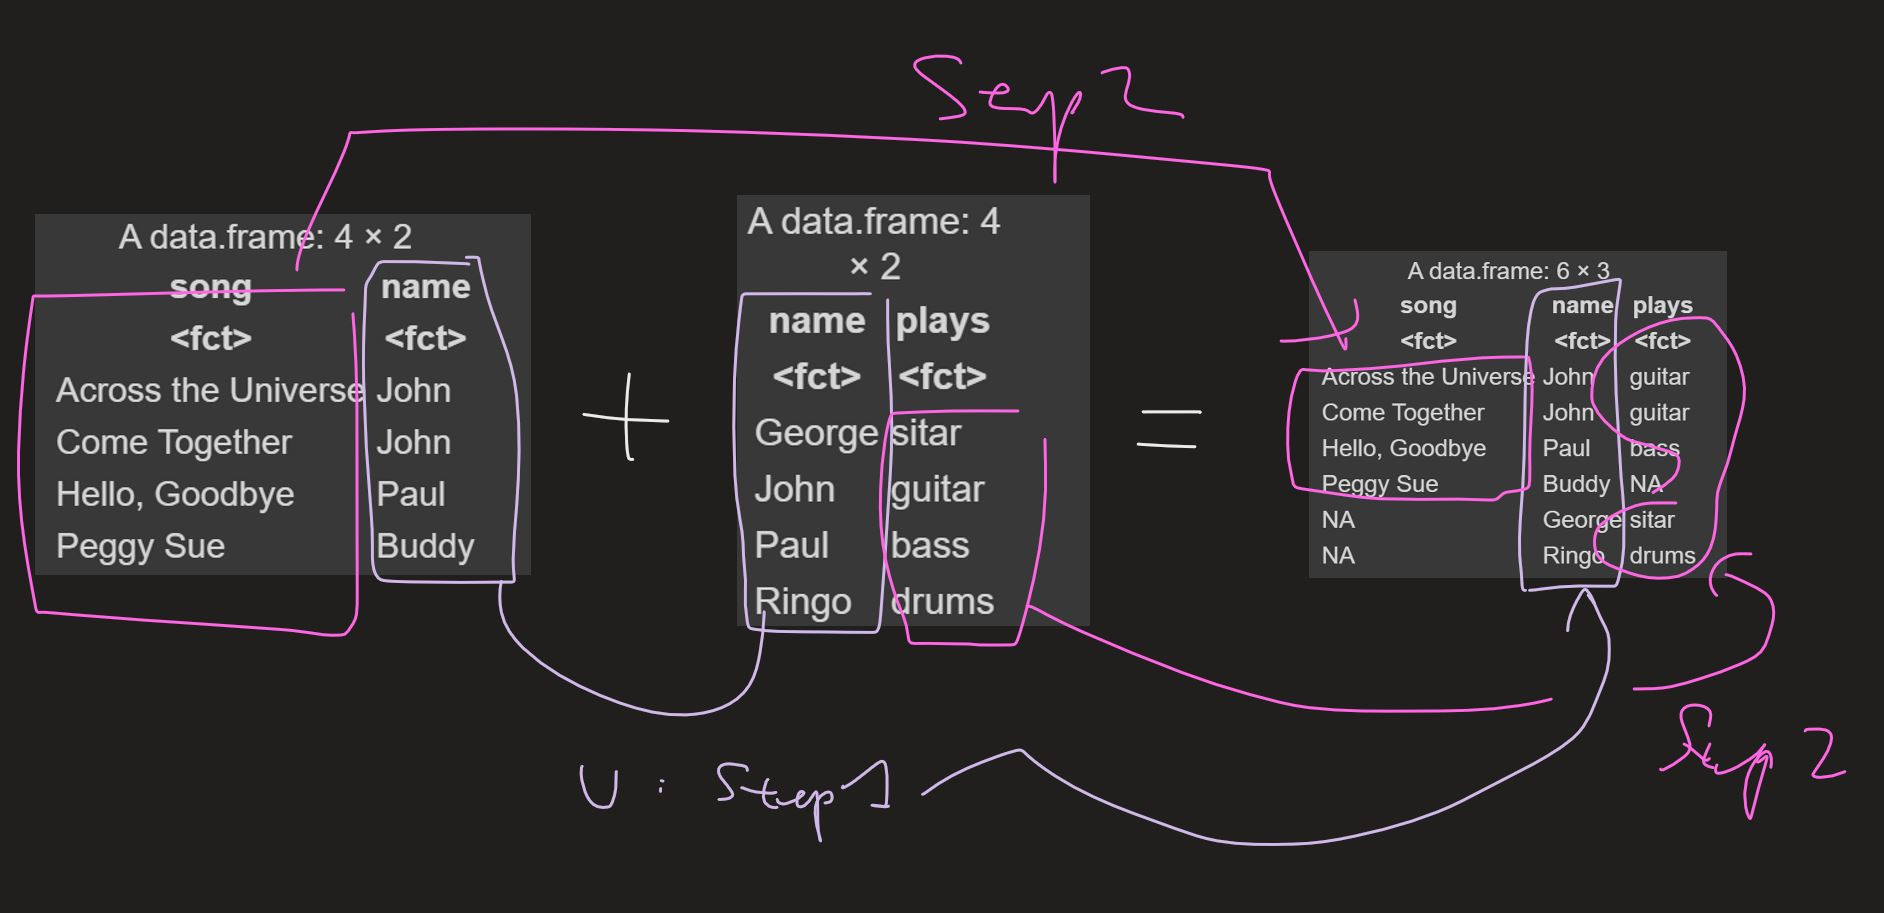

In [38]:
songs

artists

full_join(songs, artists, by = "name")

song,name
<fct>,<fct>
Across the Universe,John
Come Together,John
"Hello, Goodbye",Paul
Peggy Sue,Buddy


name,plays
<fct>,<fct>
George,sitar
John,guitar
Paul,bass
Ringo,drums


song,name,plays
<fct>,<fct>,<fct>
Across the Universe,John,guitar
Come Together,John,guitar
"Hello, Goodbye",Paul,bass
Peggy Sue,Buddy,NA
NA,George,sitar
NA,Ringo,drums
